In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
X=df.drop(columns=['CustomerID','Gender','Age'],axis=1)

In [12]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [13]:
X=X.values

In [14]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

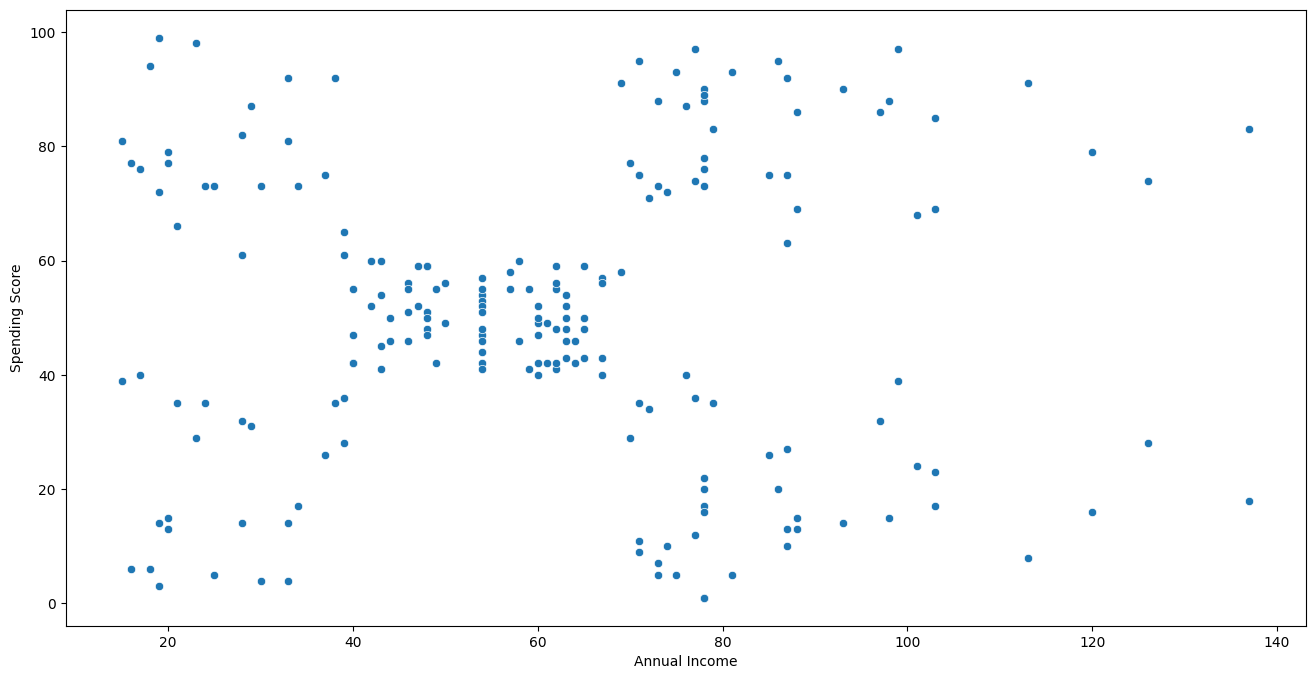

In [19]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=X[:,0],y=X[: ,1])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()


In [27]:
from sklearn.cluster import KMeans


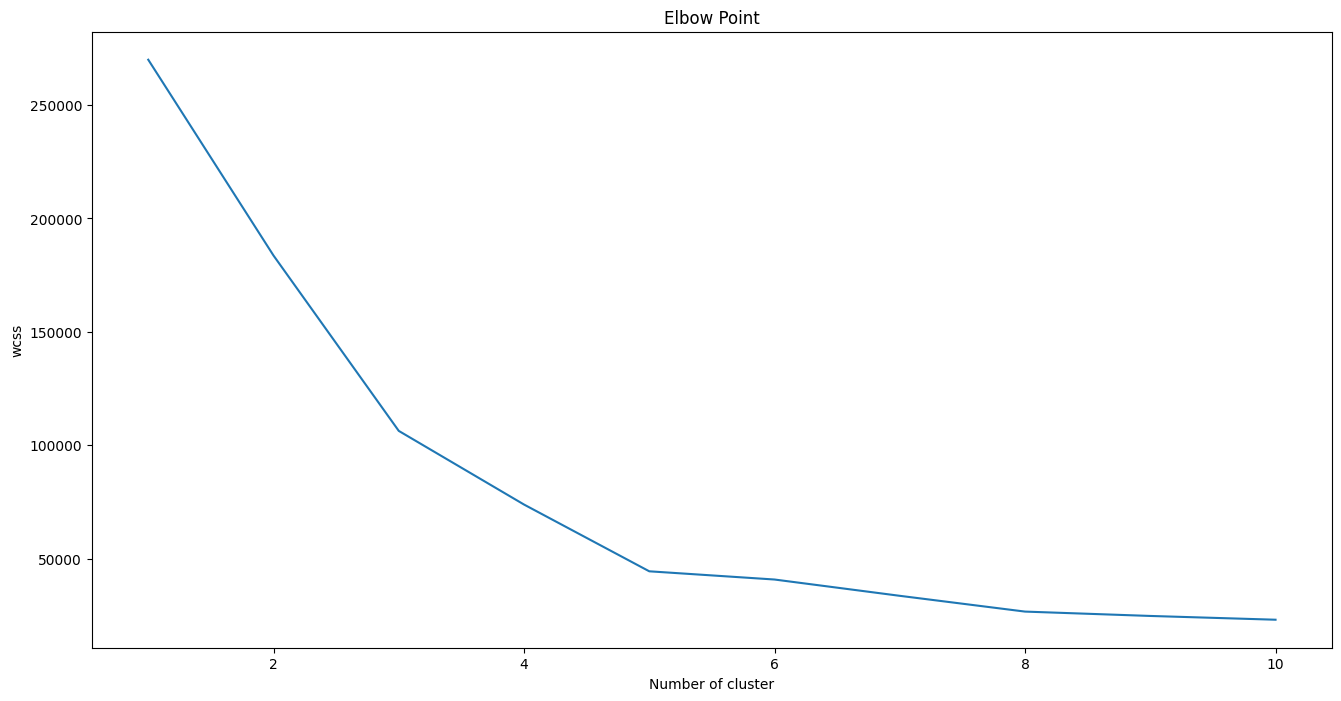

In [29]:
wcss=[]
for i in range(1,11):
     kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
     kmeans.fit(X)
     wcss.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss)
plt.title("Elbow Point")
plt.xlabel('Number of cluster')
plt.ylabel('wcss')
plt.show()

In [32]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
Y=kmeans.fit_predict(X)

In [33]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

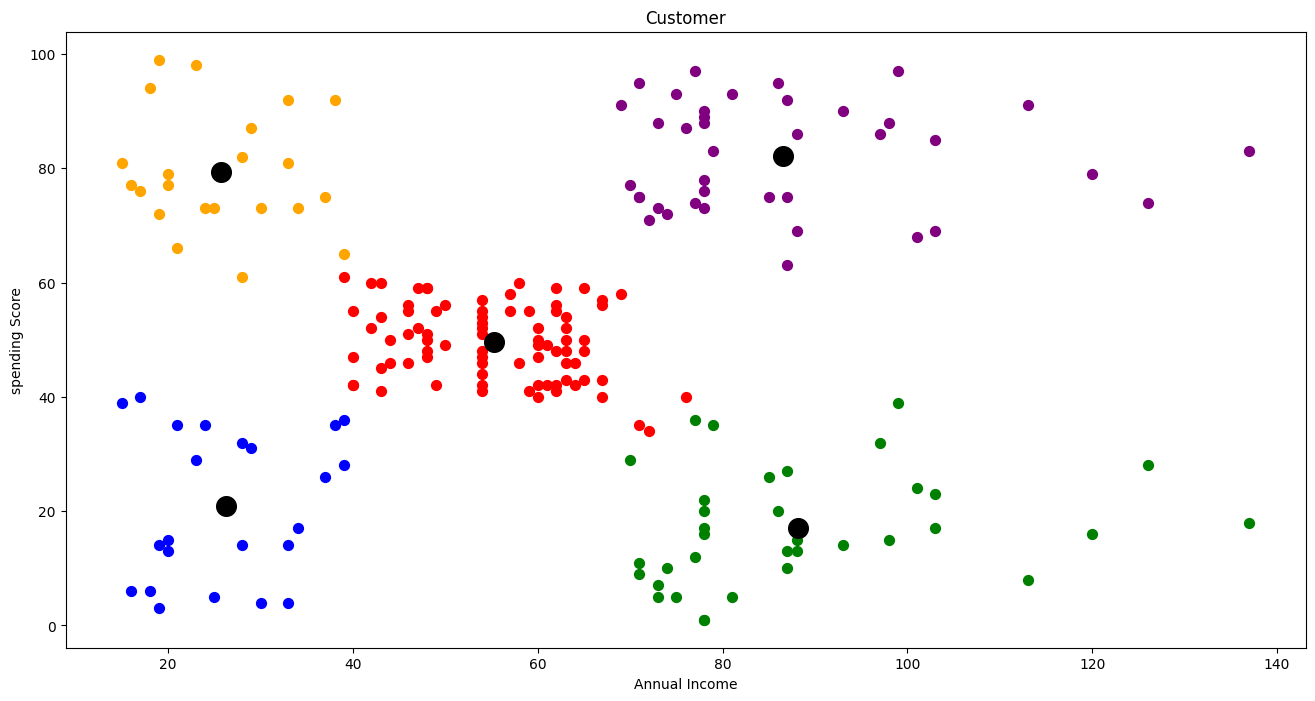

In [35]:
plt.figure(figsize=(16,8))
plt.scatter(X[Y==0,0],X[Y==0,1],s=50,c='red',label='Cluster_1')
plt.scatter(X[Y==1,0],X[Y==1,1],s=50,c='purple',label='Cluster_2')
plt.scatter(X[Y==2,0],X[Y==2,1],s=50,c='orange',label='Cluster_3')
plt.scatter(X[Y==3,0],X[Y==3,1],s=50,c='green',label='Cluster_4')
plt.scatter(X[Y==4,0],X[Y==4,1],s=50,c='blue',label='Cluster_5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='black',label='centroid')
plt.title('Customer')
plt.xlabel('Annual Income')
plt.ylabel('spending Score')
plt.show()

# Clstering with number of cluster = 5 i.e decided by wcss